# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [40]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

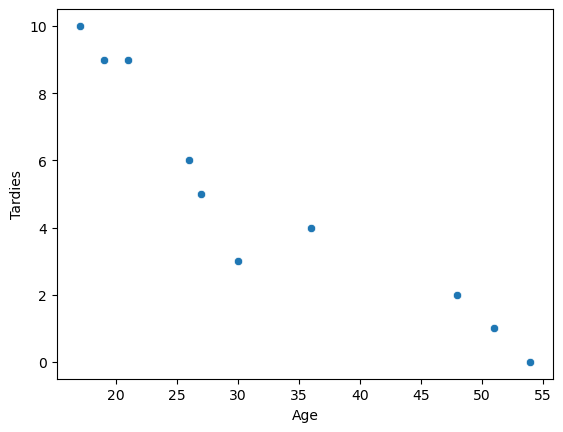

In [41]:
sns.scatterplot(student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

# We can observe a linear trend where as 'Age' increases, the number of 'Tardies' decreases

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [42]:
# 1. Calculate Covariance
covariance = student_data.cov()
print("Covariance Matrix:\n", covariance)

# 2. Calculate Correlation
correlation = student_data.corr()
print("\nCorrelation Matrix:\n", correlation)



Covariance Matrix:
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

Correlation Matrix:
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [43]:
# We are going to implement a Linear Regression Model, since we only have 2 variables, and the plot seems to imply a linear correlation between both variables

lm = LinearRegression()
X = student_data['Age'].values.reshape(-1, 1)
y = student_data['Tardies'].values # the value of the variable we want to compare

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

print(X)
print(y)


(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)
13.147112202412726 [-0.24970642]
[[17]
 [51]
 [27]
 [21]
 [36]
 [48]
 [19]
 [26]
 [54]
 [30]]
[10  1  5  9  4  2  9  6  0  3]


Plot your regression model on your scatter plot.

Score:
0.850164930648632 0.9698731325085547
MSE:
1.6083858225685916 0.2711418074230084


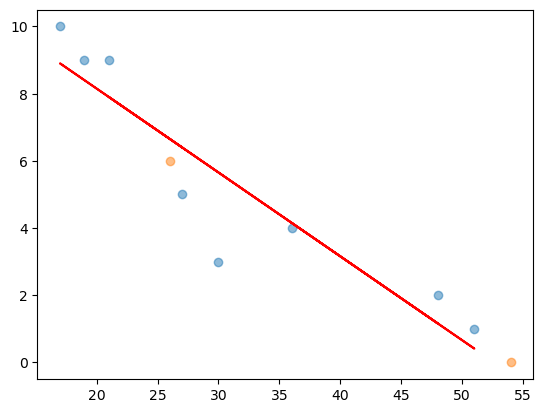

In [44]:
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

By plotting the data and the prediction model, we can conclude that our Regression Model is accurate, with some error as always. As students get older, their tardiness decreases.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [ ]:
for
# 2. Calculate Correlation
correlation = student_data.corr()
print("\nCorrelation Matrix:\n", correlation)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [57]:
# Define X and y
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]  # Select features (all columns except 'PRICE')
y = vehicles['CO2 Emission Grams/Mile']  # Target variable



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import mean_squared_error

n_features = len(X_train.columns)  # Get number of features from training data (more reliable)

scores = []


for i in range(n_features):
    # Select feature by name (assuming column names are informative)
    feat_name = X_train.columns[i]  # Use training data for column names
    feat1_train = X_train[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature
    feat1_test = X_test[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature

    # Train model
    regr_feat1 = LinearRegression()
    regr_feat1.fit(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable

    # Predict (assuming y_test is a Series)
    y_train_pred = regr_feat1.predict(feat1_train)
    y_test_pred = regr_feat1.predict(feat1_test)

    # Evaluate model (using mean squared error)
    train_score = regr_feat1.score(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable
    test_score = regr_feat1.score(feat1_test, y_test.values.reshape(-1, 1))  # Reshape target variable
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    scores.append([feat_name, train_score, test_score, mse_train, mse_test])

# Print or analyze scores as needed
print(pd.DataFrame(scores, columns=["Feature", "Train Score", "Test Score", "Train MSE", "Test MSE"]))

             Feature  Train Score  Test Score     Train MSE      Test MSE
0               Year     0.049882    0.047530  13427.836565  13661.724017
1          Cylinders     0.567161    0.561843   6117.232589   6284.684192
2  Fuel Barrels/Year     0.975133    0.962428    351.438294    538.907501
3       Combined MPG     0.858258    0.856472   2003.208083   2058.685038
4     Fuel Cost/Year     0.866066    0.868243   1892.865362   1889.856434


Fuel Barrels/Year seems to be the most important feature to determine information about CO2 grams/Mile. In addition, the Year is the one that provides less amount of information.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [58]:
# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

717.7969851833825 [-0.29871332  1.77103457 19.58139142 -2.84815675  0.03002177]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          5.256e+06
Date:                     Wed, 02 Oct 2024   Prob (F-statistic):                        0.00
Time:                             15:50:24   Log-Likelihood:                     -1.2090e+05
No. Observations:                    28761   AIC:                                  2.418e+05
Df Residuals:                        28756   BIC:                                  2.418e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0588      0.001     63.777      0.000       0.057       0.061
Cylinders             0.8461      0.087      9.674      0.000       0.675       1.018
Fuel Barrels/Year    20.3546      0.064    316.480      0.000      20.229      20.481
Combined MPG         -2.8517      0.047    -60.603      0.000      -2.944      -2.759
Fuel Cost/Year        0.0270      0.001     51.522      0.000       0.026       0.028
==============================================================================
Omnibus:                    60753.384   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        314379695.953
Skew:                          18.433   Prob(JB):                         0.00
Kurtosis:                     513.861   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Regression Model summary shows how the coeficient between Fuel Barrels/Year and CO Grams//Mile is the highest, determininng that this is the most important variable in our study

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [66]:
party_attendace = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

(8, 1) (6, 1) (2, 1)
(8,) (6,) (2,)
-0.6948176583493275 [0.88099808]


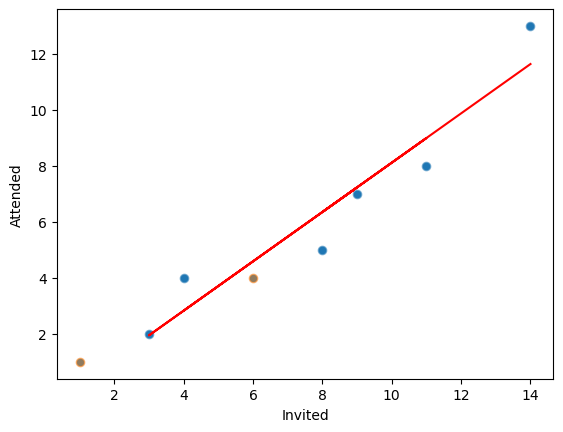

In [69]:
sns.scatterplot(party_attendace, x='Invited', y='Attended')

# We are going to implement a Linear Regression Model, since we only have 2 variables, and the plot seems to imply a linear correlation between both variables

lm = LinearRegression()
X = party_attendace['Invited'].values.reshape(-1, 1)
y = party_attendace['Attended'].values # the value of the variable we want to compare

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")




What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

The plot shows that there is a linear correlation between the two variables

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

(6, 1) (4, 1) (2, 1)
(6,) (4,) (2,)
0.3620689655172411 [0.5862069]


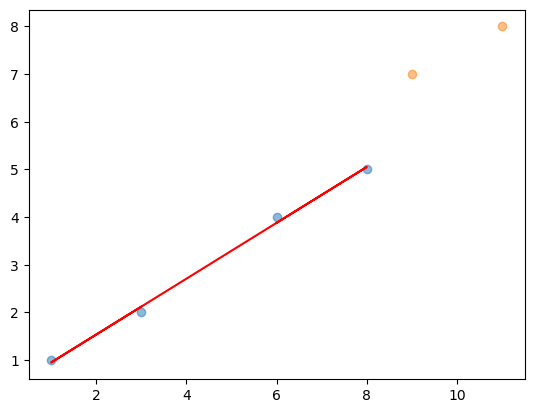

In [72]:
# there are 2 points that are problematic, (4,4) where Everybody attented the party, unusual... and (14,13) which has a much higher rate of attendance than the rest of the data. 
# Our new model is dropping data points (4,4) and (14,13)
party_attendace_adjusted = pd.DataFrame({'Invited': [1,3,6,8,9,11], 'Attended': [1,2,4,5,7,8]})

X = party_attendace_adjusted['Invited'].values.reshape(-1, 1)
y = party_attendace_adjusted['Attended'].values # the value of the variable we want to compare

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

the aproximation with the regression line is more accurate, however, there are new outliers in our new model. 